In [1]:

from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


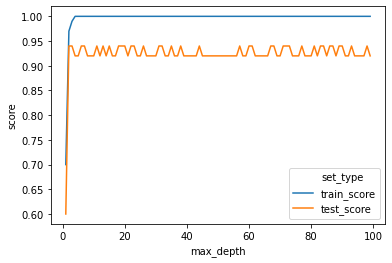

In [5]:
data_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
data_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv',index_col=0)
X_train = data_train.drop("species", axis=1)
y_train = data_train.species
X_test = data_test.drop('species', axis=1)
y_test = data_test.species
rs = np.random.seed(0)
iris_scores_data = pd.DataFrame()
for i in range(1,100):
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test,y_test)
    temp_score_data = pd.DataFrame({'max_depth': [i],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    iris_scores_data = iris_scores_data.append(temp_score_data)
scores_data_long = pd.melt(iris_scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')
import seaborn
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)